<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 9.1: NN with Keras
INSTRUCTIONS:
- Read the guides and hints, then create the necessary analysis and code to find an answer and conclusion for the task below.
- **NOTE**: This is a Regression problem. Consider the appropriate:
    - Activation function
    - Loss/Cost Function
    - Metrics

### Import libraries

In [8]:
!pip install tensorflow

In [17]:
# insert code here

import tensorflow as tf
from tensorflow import keras

import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.datasets import load_diabetes
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

# import keras
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.utils import to_categorical

In [18]:
print("Tensorflow version: ", tf.__version__)

Tensorflow version:  2.15.0


In [19]:
from tensorflow.keras.models import Sequential

In [16]:
model = Sequential()

### Load data
Load the Diabetes dataset from **SciKit-Learn**.

In [20]:
# insert code here
diabetes = load_diabetes()

### Prepare input data

In [21]:
# insert code here
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

### Split the data (training/test)

In [23]:
# insert code here
X = diabetes.data
X
# Convert the target to categorical #multi class classification one row 1 and other 0 out of 10 cols
y = diabetes.target
y


array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

In [25]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size = 0.3,
    random_state = 65)

### Create the model's architecture

In [26]:
# insert code here
model = Sequential()

In [27]:
# Add the first hidden layer
n_cols = X.shape[1]


model.add(Dense(15, activation = 'relu', input_shape = (n_cols, )))
# Add the second hidden layer
model.add(Dense(10, activation = 'relu'))

# Add the output layer
model.add(Dense(1, activation = 'linear'))

In [28]:
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 15)                165       
                                                                 
 dense_1 (Dense)             (None, 10)                160       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 336 (1.31 KB)
Trainable params: 336 (1.31 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


### Compile the model

In [29]:
# insert code here
model.compile(
    optimizer = 'adam',
    loss = 'mse', #mean square error
    metrics = ['mse'])

### Fit the training data

In [30]:
%%time
# insert code here
# Fit the model
history = model.fit(
    X_train,
    y_train,
    validation_split = 0.25,
    batch_size = 10,
    epochs = 100,
    verbose = 1)

Epoch 1/100


24/24 [==============================] - 2s 15ms/step - loss: 27796.5117 - mse: 27796.5117 - val_loss: 30886.7207 - val_mse: 30886.7207
Epoch 2/100
24/24 [==============================] - 0s 5ms/step - loss: 27765.6914 - mse: 27765.6914 - val_loss: 30849.5801 - val_mse: 30849.5801
Epoch 3/100
24/24 [==============================] - 0s 5ms/step - loss: 27725.7559 - mse: 27725.7578 - val_loss: 30796.0059 - val_mse: 30796.0059
Epoch 4/100
24/24 [==============================] - 0s 5ms/step - loss: 27666.2520 - mse: 27666.2520 - val_loss: 30718.2598 - val_mse: 30718.2598
Epoch 5/100
24/24 [==============================] - 0s 5ms/step - loss: 27576.0879 - mse: 27576.0859 - val_loss: 30600.1855 - val_mse: 30600.1855
Epoch 6/100
24/24 [==============================] - 0s 5ms/step - loss: 27440.1191 - mse: 27440.1191 - val_loss: 30420.7793 - val_mse: 30420.7793
Epoch 7/100
24/24 [==============================] - 0s 5ms/step - loss: 27238.5449 - mse: 27238.5469 - val_loss: 3

24/24 [==============================] - 0s 4ms/step - loss: 3753.5547 - mse: 3753.5547 - val_loss: 4016.4114 - val_mse: 4016.4114
Epoch 55/100
24/24 [==============================] - 0s 5ms/step - loss: 3720.6311 - mse: 3720.6309 - val_loss: 3988.3208 - val_mse: 3988.3208
Epoch 56/100
24/24 [==============================] - 0s 5ms/step - loss: 3692.1873 - mse: 3692.1873 - val_loss: 3979.5386 - val_mse: 3979.5386
Epoch 57/100
24/24 [==============================] - 0s 6ms/step - loss: 3671.4824 - mse: 3671.4824 - val_loss: 3963.6111 - val_mse: 3963.6111
Epoch 58/100
24/24 [==============================] - 0s 5ms/step - loss: 3648.4451 - mse: 3648.4451 - val_loss: 3942.2432 - val_mse: 3942.2432
Epoch 59/100
24/24 [==============================] - 0s 6ms/step - loss: 3626.1021 - mse: 3626.1021 - val_loss: 3935.4287 - val_mse: 3935.4287
Epoch 60/100
24/24 [==============================] - 0s 5ms/step - loss: 3606.9482 - mse: 3606.9482 - val_loss: 3923.6531 - val_mse: 3923.6531
Epoch

In [31]:
dir(history)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_chief_worker_only',
 '_implements_predict_batch_hooks',
 '_implements_test_batch_hooks',
 '_implements_train_batch_hooks',
 '_keras_api_names',
 '_keras_api_names_v1',
 '_supports_tf_logs',
 'epoch',
 'history',
 'model',
 'on_batch_begin',
 'on_batch_end',
 'on_epoch_begin',
 'on_epoch_end',
 'on_predict_batch_begin',
 'on_predict_batch_end',
 'on_predict_begin',
 'on_predict_end',
 'on_test_batch_begin',
 'on_test_batch_end',
 'on_test_begin',
 'on_test_end',
 'on_train_batch_begin',
 'on_train_batch_end',
 'on_train_begin',
 'on_train_end',
 'params',
 'set_model',
 'set_params',
 'validation_data']

### Create predictions

In [32]:
# insert code here
predictions = model.predict(X_test)
#for every training data will have a probility score

5/5 [==============================] - 0s 3ms/step


In [33]:
predictions

array([[179.92624 ],
       [197.04143 ],
       [182.14603 ],
       [235.45712 ],
       [180.5267  ],
       [236.75548 ],
       [166.55923 ],
       [ 90.721634],
       [144.09447 ],
       [168.62805 ],
       [213.75201 ],
       [201.91127 ],
       [110.94133 ],
       [211.42555 ],
       [123.37435 ],
       [204.49414 ],
       [ 90.595795],
       [141.70981 ],
       [138.86491 ],
       [139.6539  ],
       [ 80.684235],
       [ 90.47922 ],
       [165.94424 ],
       [150.31094 ],
       [203.32037 ],
       [172.29953 ],
       [127.2429  ],
       [103.89561 ],
       [157.01611 ],
       [207.85797 ],
       [233.40457 ],
       [228.17055 ],
       [169.45938 ],
       [147.07518 ],
       [131.15186 ],
       [164.79143 ],
       [117.733604],
       [198.27042 ],
       [179.54573 ],
       [125.72566 ],
       [126.200264],
       [124.4126  ],
       [192.97267 ],
       [202.67946 ],
       [152.0197  ],
       [224.65697 ],
       [163.42119 ],
       [190.2

### Evaluate the model

In [34]:
# insert code here
score = model.evaluate(X_test, y_test)
print('\nTest loss: %.6f, Test accuracy: %.6f' % tuple(score))

#or 
#print(\nTest loss: %.6f % score[0])

5/5 [==============================] - 0s 3ms/step - loss: 3430.6831 - mse: 3430.6831

Test loss: 3430.683105, Test accuracy: 3430.683105


### Visualization of cost

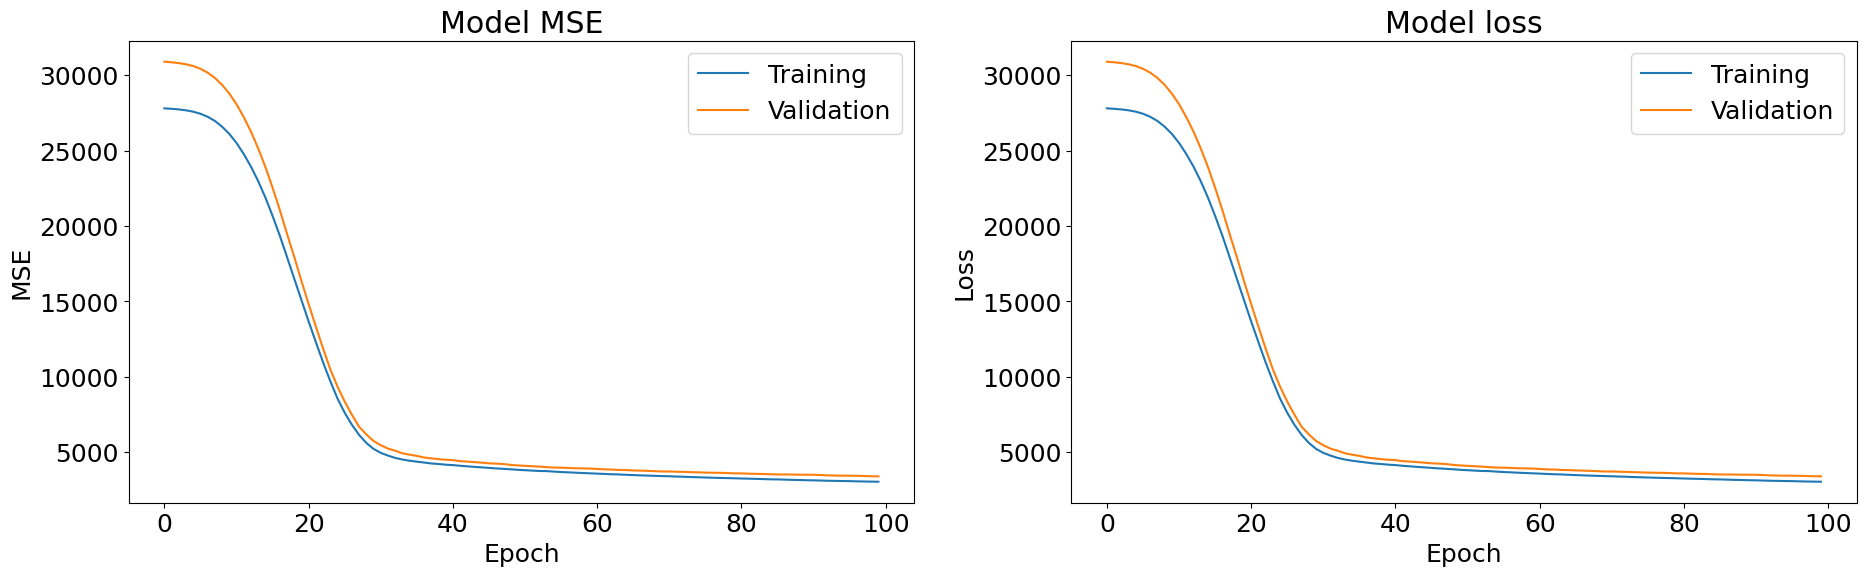

In [37]:
# insert code here *R SQUARE VALUE & MSE

fig, ax = plt.subplots(1, 2, figsize = (18, 6))
fig.subplots_adjust(left = 0.02, right = 0.98, wspace = 0.2)

plt.rcParams.update({'font.size': 18})

# Plot training & validation accuracy values
ax[0].plot(history.history['mse'], label = 'Training')
ax[0].plot(history.history['val_mse'], label = 'Validation')
ax[0].set_title('Model MSE')
ax[0].set_ylabel('MSE')
ax[0].set_xlabel('Epoch')
ax[0].legend()

# Plot training & validation loss values
ax[1].plot(history.history['loss'], label = 'Training')
ax[1].plot(history.history['val_loss'], label = 'Validation')
ax[1].set_title('Model loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend()

plt.show()

### Visualization of residuals

In [40]:
# insert code here

from sklearn.metrics import r2_score 

r2 = r2_score(y_test,predictions)
r2

0.43261216266959024



---



---



> > > > > > > > > © 2023 Institute of Data


---



---



